### This notebook produces Fig. 1

In [1]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm

import matplotlib.pyplot as plt

# System size
L = 3

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
H_TFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TFIM = H_TFIM + X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)
H_TFIM = H_TFIM + Z.at(L)    
hamiltonian_name = "TFIM_L_" +str(L)    

Flow step  0  using H with norm  6.324555320336759
    Found minimum norm =  2.8709178451078183  for s =  0.6060606060606061
Flow step  1  using H with norm  6.32455532033676
    Found minimum norm =  2.0939975923527765  for s =  0.9494949494949496
Flow step  2  using H with norm  6.324555320336757
    Found minimum norm =  1.86477768920011  for s =  0.04040404040404041
Flow step  3  using H with norm  6.324555320336757
    Found minimum norm =  1.717821047664804  for s =  0.10101010101010102
Flow step  4  using H with norm  6.324555320336757
    Found minimum norm =  1.6556726663433747  for s =  0.04040404040404041
Flow step  5  using H with norm  6.324555320336757
    Found minimum norm =  1.629667352447171  for s =  0.07070707070707072
Flow step  6  using H with norm  6.324555320336757
    Found minimum norm =  1.617059978274342  for s =  0.04040404040404041
Flow step  7  using H with norm  6.324555320336757
    Found minimum norm =  1.6094320932149755  for s =  0.09090909090909091


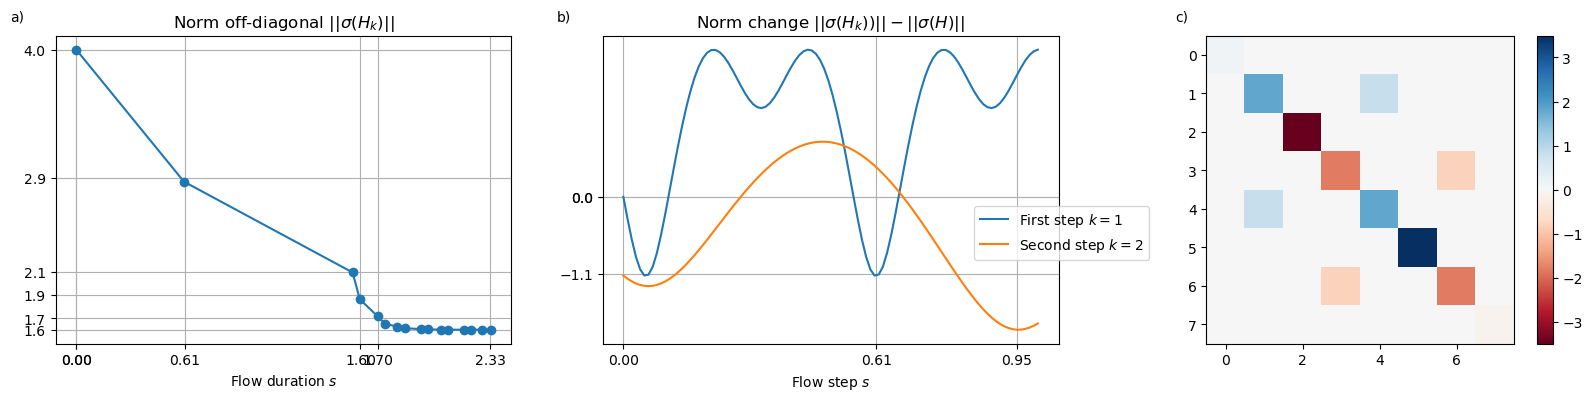

In [8]:
from class_double_bracket_flow import *


flow = double_bracket_flow( H_TFIM )

flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.nmb_search_points_minimizing_s_search = 100
flow.flow_step_max = 1
flow.nmb_flow_steps = 15
flow.please_use_binary_search =  False
flow.please_compute_observables = False
flow.flow_forwards( )

flow.show_flow_forwards_results()

# flow_results = flow.flow_outputs
# ini_norm = flow_results['minimal_norm_sigma_H_s'][0]
# plt.plot(flow_results['s_grid'][1],flow_results['all_norms_computed_in_search'][0]-ini_norm,'-', label=r'First step $k=1$')
# plt.plot(flow_results['s_grid'][2],flow_results['all_norms_computed_in_search'][1]-ini_norm,'-', label=r'Second step $k=2$')
# plt.axvline(x = s_quadratic[1], color = 'b')
# plt.axvline(x = s_quadratic[2], color = 'g')
# x_labels_rounded = [0]+[ round(x, 2 ) for x in flow_results['minimizing_flow_step'][1:3] ]
# y_labels_rounded = [ round(y-ini_norm, 1 ) for y in flow_results['minimal_norm_sigma_H_s'][0:2] ]
# y_labels_rounded.insert(0,0)
# plt.xticks(x_labels_rounded)
# plt.yticks(y_labels_rounded)
# plt.grid()

# plt.xlabel(r'Flow step $s$')
# plt.title(r'Norm change $\vert\vert\sigma(H_{k}))\vert\vert-\vert\vert\sigma(H)\vert\vert$')
# plt.legend(loc='best', bbox_to_anchor=(0.8,0.25))

30
Flow step  0  using H with norm  6.324555320336759
    Found minimum norm =  2.876947094435952  for s =  0.049347776550354557
Flow step  1  using H with norm  6.324555320336759
    Found minimum norm =  2.7163413951595756  for s =  0.06620971632629696
Flow step  2  using H with norm  6.32455532033676
    Found minimum norm =  2.7022626210644196  for s =  0.040976063242036544
Flow step  3  using H with norm  6.32455532033676
    Found minimum norm =  2.689312385488694  for s =  0.041254390683342045
Flow step  4  using H with norm  6.32455532033676
    Found minimum norm =  2.6707093209394532  for s =  0.04117137285064883
Flow step  5  using H with norm  6.32455532033676
    Found minimum norm =  2.642034995804474  for s =  0.04396029201660127
Flow step  6  using H with norm  6.32455532033676
    Found minimum norm =  2.6015891811818115  for s =  0.04317858758431674
Flow step  7  using H with norm  6.32455532033676
    Found minimum norm =  2.5350725899084066  for s =  0.0504007773975

Text(-0.1, 1.05, 'a)')

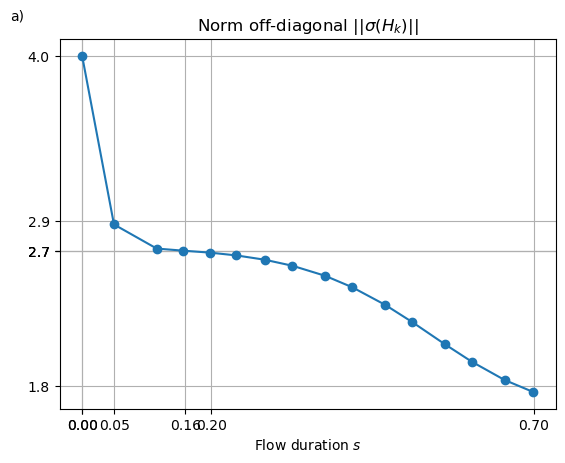

In [2]:
from class_double_bracket_flow import *


flow = double_bracket_flow( H_TFIM )
flow.flow_generator['operator'] = flow.delta(H_TFIM)

flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.flow_step_max = 1
flow.nmb_flow_steps = 30
flow.please_use_binary_search =  False
flow.please_use_quadratic_optimization = True
flow.please_compute_observables = False
flow.flow_forwards( )
s_quadratic = flow.flow_outputs['minimizing_flow_step']
print(len(s_quadratic))

flow_results = flow.flow_outputs
norms = flow_results['minimal_norm_sigma_H_s']
x_axis = [sum(flow_results['minimizing_flow_step'][:k]) for k in range( 1, len(flow_results['minimizing_flow_step'])+1)]
#plot
plt.plot( x_axis, norms, '-o')   


#axis labels
x_labels_rounded = [ round(x, 2 ) for x in x_axis ]
x_labels_rounded = [0] + x_labels_rounded[0:5] + [max(x_labels_rounded)]
x_labels_rounded.pop(3)
plt.xticks(x_labels_rounded)

y_labels_rounded = [ round(y, 1 ) for y in norms ]
y_labels_rounded = y_labels_rounded[0:5] + [min(y_labels_rounded)]
plt.yticks(y_labels_rounded)

plt.grid()

plt.xlabel(r'Flow duration $s$')
plt.title(r'Norm off-diagonal $\vert\vert\sigma(H_k)\vert\vert$')

#panel label
a =-.1
b = 1.05
plt.annotate('a)', xy = (a,b), xycoords='axes fraction')


In [ ]:
flow_q = double_bracket_flow( H_TFIM )
H = np.copy(H_TFIM)
D = flow_q.delta(H_TFIM)
for step in range(15):
    W = flow_q.commutator(D, H)
    s_min = flow_q.commutator
    flow_gen = expm(s_min * W)

/home/marek/Projects/Quantum_decoupling_algorithm/numerical_code/class_double_bracket_flow.py:960: UserWarning: FixedFormatter should only be used together with FixedLocator
  axin1.set_xticklabels([1]+['']*(2**L-2)+[2**L])
/home/marek/Projects/Quantum_decoupling_algorithm/numerical_code/class_double_bracket_flow.py:987: UserWarning: FixedFormatter should only be used together with FixedLocator
  axin2.set_xticklabels([1]+['']*(2**L-2)+[2**L])


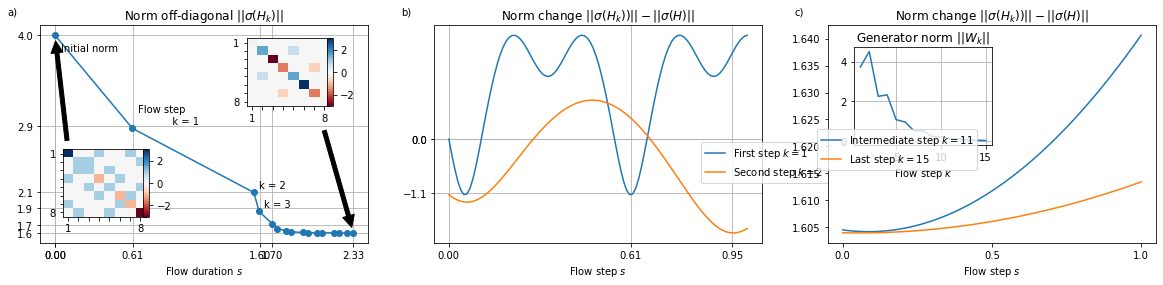

In [3]:

flow.show_flow_forwards_results_fancy()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/lib/python3/dist-packages/ipykernel_launcher.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


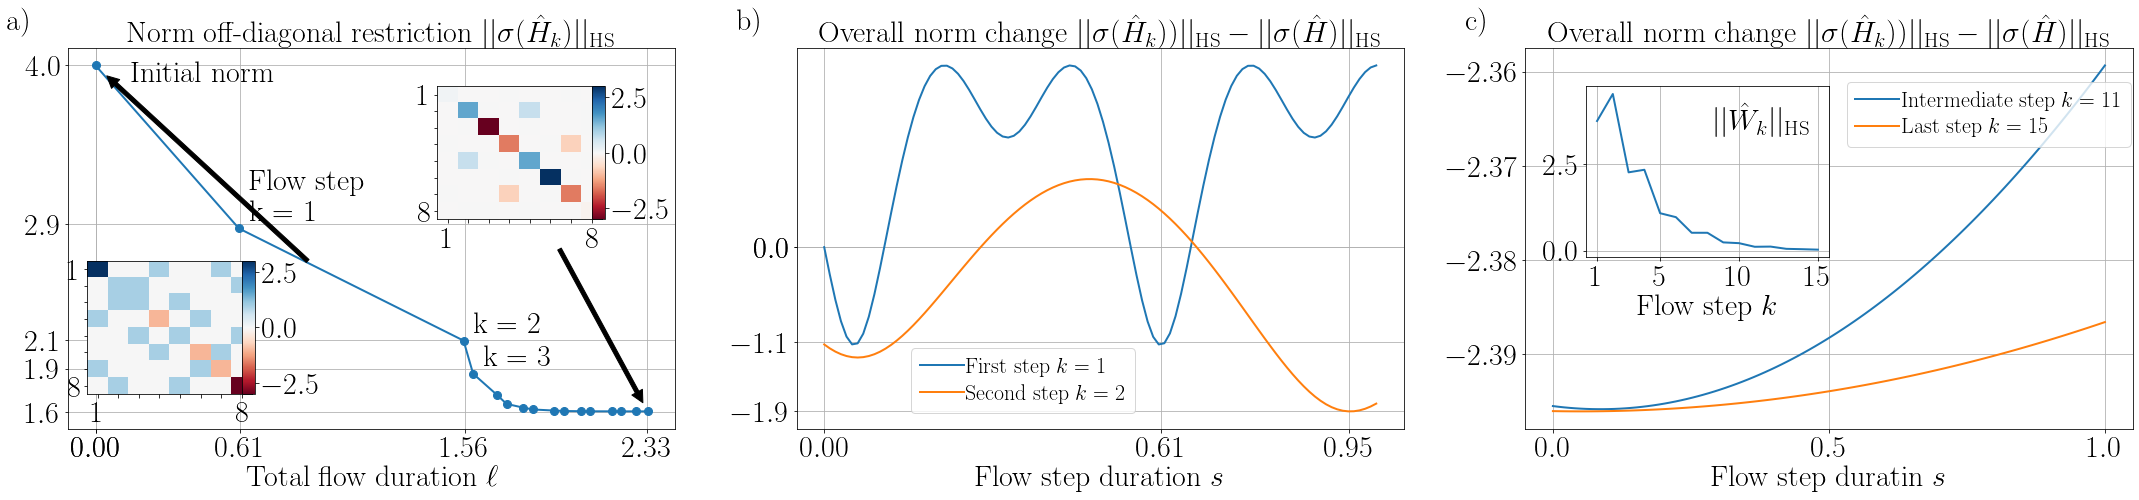

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
flow.run_param_rc()
plt.rcParams['legend.fontsize'] = 22
def plot_iteration_results(  ):
    flow_results = flow.flow_outputs

    f=plt.figure(figsize = ( 37,7 ))
    n=3
    ax_a = f.add_subplot(1,n,1)
    norms = flow_results['minimal_norm_sigma_H_s']
    x_axis = [sum(flow_results['minimizing_flow_step'][:k])for k in range( 1, len(flow_results['minimizing_flow_step'])+1)]

    plt.plot( x_axis, norms, '-o')   
    k=0
    for xy in zip([x+.041 for x in x_axis[0:4]], 
                  [n + 0.05 for n in norms[0:4]]):                                       # <--
        if k == 0:
            plt.annotate('Initial norm', xy=(.15,norms[0]-.12), 
                         textcoords='data')
        elif k == 1:
            plt.annotate('Flow step\n           k = %d' % k, xy=xy, textcoords='data')

        else:
            plt.annotate('k = %d' % k, xy=xy, textcoords='data')
        k=k+1
    x_labels_rounded = [ round(x, 2 ) for x in x_axis ]
    x_labels_rounded = [0] + x_labels_rounded[0:4] + [max(x_labels_rounded)]
    x_labels_rounded.pop(4)
    plt.xticks(x_labels_rounded)
    y_labels_rounded = [ round(y, 1 ) for y in norms ]
    y_labels_rounded = y_labels_rounded[0:4] + [min(y_labels_rounded)]
    plt.yticks(y_labels_rounded)
    plt.grid()
    plt.xlabel(r'Total flow duration $\ell$')
    plt.title(r'Norm off-diagonal restriction $\vert\vert\sigma(\hat H_k)\vert\vert_\mathrm{HS}$')
    a =-.1
    b = 1.05
    plt.annotate('a)', xy = (a,b), xycoords='axes fraction')

    
    axin1 = ax_a.inset_axes([0.01,.091, 0.35, 0.35])
    inset1 = axin1.imshow( H_TFIM, cmap='RdBu' )
    divider1 = make_axes_locatable(axin1)
    div_ax = divider1.append_axes("right", size="10%", pad=0.05)
    cbar1 = plt.colorbar(inset1, cax = div_ax )
    range_plot = np.max( np.abs( H_TFIM ) )
#     cbar1.set_clim( -range_plot, range_plot )
    axin1.set_yticks(range(2**L))  
    axin1.set_xticklabels([1]+['']*(2**L-2)+[2**L])
    axin1.set_yticklabels([1]+['']*(2**L-2)+[2**L])
    axin1.set_xticks(range(2**L))
    ax_a.annotate(' ',
            xy=(x_axis[0], norms[0]),  # theta, radius
            xytext=(0.15, 0.4),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')
#     axin1.set_xlabel(r'$j$')
#     axin1.set_title(r'$k$')
#     axin1.grid()
    axin2 = ax_a.inset_axes([0.586,.55, 0.35, 0.35])
    inset2 = axin2.imshow(flow_results['final_flowed_H'][-1], cmap='RdBu')

    divider2 = make_axes_locatable(axin2)
    div_ax2 = divider2.append_axes("right", size="10%", pad=0.05)
    cbar2 = plt.colorbar(inset1, cax = div_ax2 )
    ax_a.annotate(' ',
        xy=(x_axis[-1], norms[-1]),  # theta, radius
        xytext=(0.8, 0.5),    # fraction, fraction
        textcoords='axes fraction',
        arrowprops=dict(facecolor='black', shrink=0.05),
        horizontalalignment='left',
        verticalalignment='bottom')

    axin2.set_yticks(range(2**L))  
    axin2.set_xticklabels([1]+['']*(2**L-2)+[2**L])
    axin2.set_yticklabels([1]+['']*(2**L-2)+[2**L])
    axin2.set_xticks(range(2**L))
    chosen_steps = [1,2]
    #chosen_steps = range(flow_results['config']['number_flow_steps'])
    f.add_subplot(1,n,2)
    plt.annotate('b)', xy = (a,b),
                 xycoords='axes fraction')
    ini_norm = flow_results['minimal_norm_sigma_H_s'][0]
    plt.plot(flow_results['s_grid'][1],flow_results['all_norms_computed_in_search'][0]-ini_norm,'-', label=r'First step $k=1$')
    plt.plot(flow_results['s_grid'][2],flow_results['all_norms_computed_in_search'][1]-ini_norm,'-', label=r'Second step $k=2$')
    x_labels_rounded = [0]+[ round(x, 2 ) for x in flow_results['minimizing_flow_step'][1:3] ]
    y_labels_rounded = [ round(y-ini_norm, 1 ) for y in flow_results['minimal_norm_sigma_H_s'][0:2] ]
    y_labels_rounded.insert(0,0)
    y_labels_rounded.append(round(min(flow_results['all_norms_computed_in_search'][1]-ini_norm),1))
    plt.xticks(x_labels_rounded)
    plt.yticks(y_labels_rounded)
    plt.grid()
    plt.xlabel(r'Flow step duration $s$')
    plt.title(r'Overall norm change $\vert\vert\sigma(\hat H_{k}))\vert\vert_\mathrm{HS}-\vert\vert\sigma(\hat H)\vert\vert_\mathrm{HS}$')
    plt.legend(loc='best', bbox_to_anchor=(0.17,0.24))

    ax = f.add_subplot(1,n,3)
    plt.annotate('c)', xy = (a,b),
                 xycoords='axes fraction')
    ini_norm = flow_results['minimal_norm_sigma_H_s'][0]
    k=11
    plt.plot(flow_results['s_grid'][-1],flow_results['all_norms_computed_in_search'][k]-ini_norm,'-', 
             label=r'Intermediate step $k=' +str(k)+'$')
    plt.plot(flow_results['s_grid'][-1],flow_results['all_norms_computed_in_search'][-1]-ini_norm,'-', 
             label=r'Last step $k=' +str(len(flow_results['s_grid'])-1)+'$')

    x_labels_rounded = [ 0,.5,1 ]
    y_labels_rounded = [ round(y, 1 ) for y in flow_results['minimal_norm_sigma_H_s'][1:3] ]
    y_labels_rounded.insert(0,0)
    plt.xticks(x_labels_rounded)
    #plt.yticks(y_labels_rounded)
    plt.grid()
    plt.xlabel(r'Flow step duratin $s$')
    plt.title(r'Overall norm change $\vert\vert\sigma(\hat H_{k}))\vert\vert_\mathrm{HS}-\vert\vert\sigma(\hat H)\vert\vert_\mathrm{HS}$')
    plt.legend( loc=1,bbox_to_anchor=(1.0152,.94)) 
    axin1 = ax.inset_axes([0.1,.45, 0.4, 0.45])
    norms_W_plot = [flow_results['norms_flow_generator_W'][k] for k in range(1,len(flow_results['s_grid']))]
    axin1.plot(np.linspace(1,15,15), norms_W_plot,'-')
    axin1.set_xlabel(r'Flow step $k$')
    #axin1.set_title(r'Generator norm $\vert\vert \hat W_k\vert\vert_\mathrm{HS}$')
    axin1.annotate(r'$\vert\vert \hat W_k\vert\vert_\mathrm{HS}$', xy = (.53,.75),
                 xycoords='axes fraction')
    axin1.set_xticks([1,5,10,15])
    axin1.grid()

    save_path = 'figs/Fig_1_overview_'+str(flow.nmb_flow_steps)+\
    '_L_'+str(L)+'.pdf'
    plt.savefig( save_path, format='pdf')
    plt.show()
plot_iteration_results()

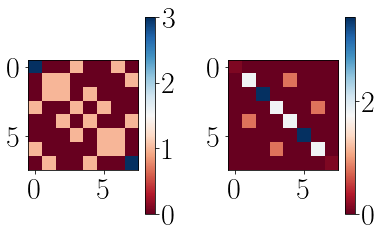

In [5]:
H = flow.flow_outputs['final_flowed_H'][-1]

plt.figure()
plt.subplot(121)
plt.imshow(abs(H_TFIM), cmap='RdBu')
plt.colorbar()
plt.subplot(122)
plt.imshow(abs(H), cmap='RdBu')
plt.colorbar()
plt.tight_layout()

### Comparison of norm scales

In [6]:
np.linalg.norm( flow.sigma(H_TFIM), 2)

2.0000000000000004

In [7]:
np.linalg.norm( flow.sigma(H_TFIM), 'fro')

4.0

In [8]:
np.linalg.norm( flow.sigma(H_TFIM))

4.0